In [2]:
#IMPORT
import matplotlib.pyplot as plt
import numpy as np
from time import time

(442, 10)
Fit done in 0.145s
R2 Score OLS:  0.47257544798227125
R2 Score Ridge:  0.4723140152635421
R2 Score Elastic:  0.4632851384526627


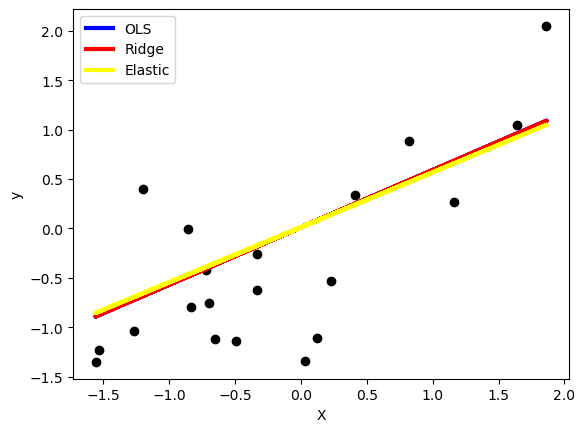

In [3]:
#Linear Regression
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing

#Data
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

#Load diabetes dataset
diab_X, diab_y = datasets.load_diabetes(return_X_y=True)
print(diab_X.shape)

#Use only 1 feature from the dataset
diab_X = diab_X[:,np.newaxis,2]

#Preprocessing data
scalerx = preprocessing.StandardScaler().fit(diab_X)
diab_X_scaled = scalerx.transform(diab_X)

diab_y_2d = diab_y.reshape(-1, 1)  
scalery = preprocessing.StandardScaler().fit(diab_y_2d)
diab_y_scaled_2d = scalery.transform(diab_y_2d)
diab_y_scaled = diab_y_scaled_2d.flatten()  

#print(diab_x.shape)
#print(diab_x)

# Split the data into training/test sets
diab_X_train = diab_X_scaled[:-20]
diab_X_test = diab_X_scaled[-20:]

diab_y_train = diab_y_scaled[:-20]
diab_y_test = diab_y_scaled[-20:]



# Create an instance of the Linear Regression Class of the Linear_Model Module
regr = linear_model.LinearRegression() # Ordinary Least Squares (OLS)
regr_ridge = linear_model.Ridge(alpha=.5) # Ridge Model
regr_elastic =  ElasticNet(alpha=0.025, l1_ratio=0.8) # elastic net
# Note: a. For l1_ratio = 0 the penalty is pure L2 and the model is equivalent to a Ridge. 
# Similarly, l1_ratio = 1 is a pure L1 penalty 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

#Train the model
t0 = time()
regr.fit(diab_X_train, diab_y_train)
regr_ridge.fit(diab_X_train, diab_y_train)
regr_elastic.fit(diab_X_train, diab_y_train)
print(f"Fit done in {(time() - t0):.3f}s")


#Print the results
    #print("Coefficients Ordinary LS: ", regr.coef_)
    #print("Intercept Ordinary LS:: ", regr.intercept_)

#Plot the test data
plt.scatter(diab_X_test, diab_y_test, color="black")
#Plot the regression line
plt.plot(diab_X_test, regr.predict(diab_X_test), color="blue", linewidth=3,  label="OLS")
plt.plot(diab_X_test, regr_ridge.predict(diab_X_test), color="red", linewidth=3,  label="Ridge")
plt.plot(diab_X_test, regr_elastic.predict(diab_X_test), color="yellow", linewidth=3,  label="Elastic")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()  

print("R2 Score OLS: " , r2_score(diab_y_test, regr.predict(diab_X_test) ))
print("R2 Score Ridge: " , r2_score(diab_y_test, regr_ridge.predict(diab_X_test) ))
print("R2 Score Elastic: " , r2_score(diab_y_test, regr_elastic.predict(diab_X_test) ))



Fit done in 0.021s


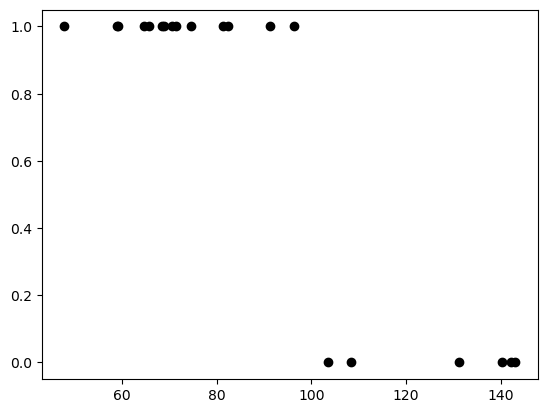

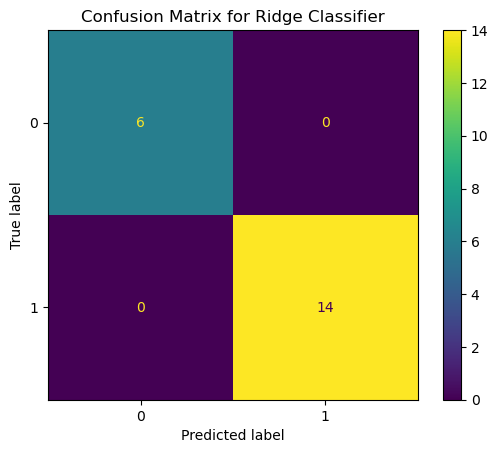

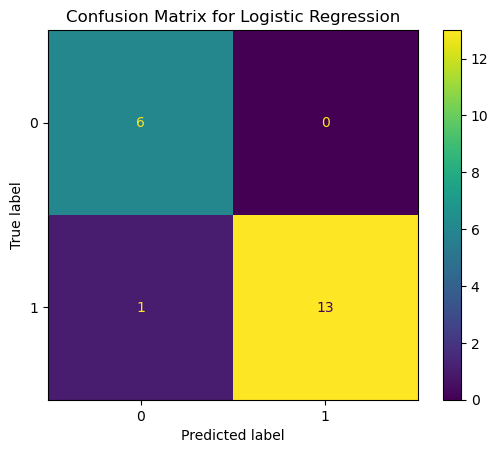

Score Ridge Classifier:  1.0
Score Logistic Regression:  0.95


In [22]:
# Binary Classification
from sklearn.linear_model import RidgeClassifier

# Data
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

#Load cancer dataset
cancer_X, cancer_y = datasets.load_breast_cancer(return_X_y=True)

#Use only 1 feature from the dataset
cancer_X = cancer_X[:,np.newaxis,2]

#Split the data into training/test sets
cancer_X_train = cancer_X[:-20]
cancer_X_test = cancer_X[-20:]

cancer_y_train = cancer_y[:-20]
cancer_y_test = cancer_y[-20:]

#Create an instance of the RidgeClassifier Class of the Linear_Model Module
clf = RidgeClassifier() 
clf_logReg = linear_model.LogisticRegression()

#Train the model
t0 = time()
clf.fit(cancer_X_train, cancer_y_train)
clf_logReg.fit(cancer_X_train, cancer_y_train)
print(f"Fit done in {(time() - t0):.3f}s")

#Plot the Data
plt.scatter(cancer_X_test, cancer_y_test, color="black")

#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#CM for Ridge Classifier
cm = confusion_matrix(cancer_y_test, clf.predict(cancer_X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix for Ridge Classifier")
plt.show()

#CM for Logistic Regression
cm = confusion_matrix(cancer_y_test, clf_logReg.predict(cancer_X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logReg.classes_)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("Score Ridge Classifier: " , clf.score(cancer_X_test, cancer_y_test))
print("Score Logistic Regression: " , clf_logReg.score(cancer_X_test, cancer_y_test))


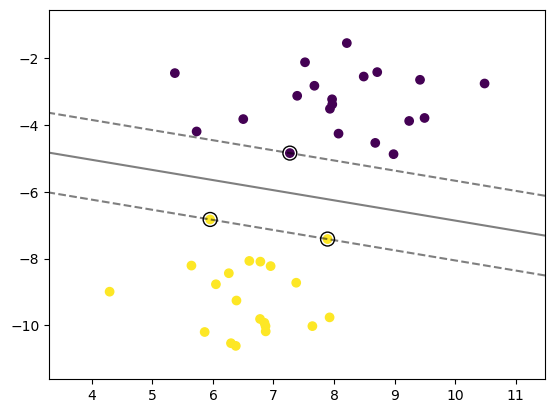

In [4]:
# Support Vector Machines: Binary Classification

# Data
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

#Load Blob Data
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

#Drop columns  except first two
X = X[:,:2]

#Plot the Data
plt.scatter(X[:,0], X[:,1], c=y )

#Create and train the SVM model
clf = svm.SVC(kernel = "linear", C=10) #linear Classifier with Regularization
clf.fit(X,y)

#Plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1], # Sets the levels at which the contours are drawn.
    alpha=0.5, #Sets the transparency of the decision boundary.
    linestyles=["--", "-", "--"], #Sets the line styles of the decision boundary contours.
    ax=ax, #Specifies the axes object (ax) where the decision boundary will be plotted.
)
#Plot support vectors
ax.scatter(  
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100, # size of the support vectors markers.
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()



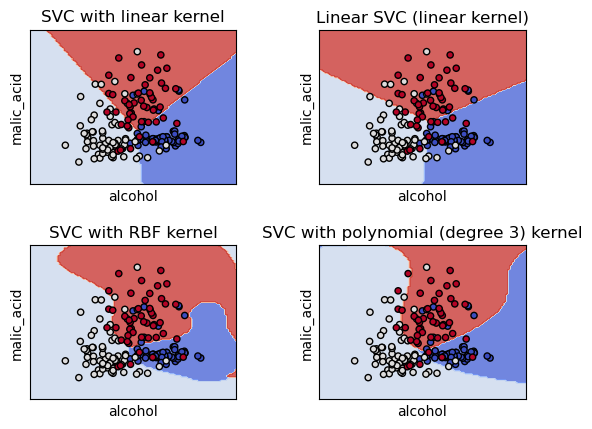

SVC with linear kernel: Score = 0.7808988764044944
Linear SVC (linear kernel): Score = 0.7640449438202247
SVC with RBF kernel: Score = 0.8370786516853933
SVC with polynomial (degree 3) kernel: Score = 0.8258426966292135


In [21]:
# Support Vector Machines: Mutliclass Classification
from sklearn.datasets import load_wine

#Load Wine Data
X, y = load_wine(return_X_y=True)
wine = datasets.load_wine()
#Drop columns  except first two
X = X[:,:2]

#Create the SVM model (for the plot)

C = 1 # Reg. Parameter
#Define different SVM models
models = (
    svm.SVC(kernel="linear", C=C), #  linear kernel, sets the regularization parameter to C 
    svm.LinearSVC(C=C, max_iter=10000), # iteration
    svm.SVC(kernel="rbf", gamma=0.7, C=C), # RBF Kernel
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C), # Polynomial Kernel
)

#Train the models
models = (clf.fit(X,y) for clf in models)



#Plot 
titles = ("SVC with linear kernel",
         "Linear SVC (linear kernel)",
         "SVC with RBF kernel",
         "SVC with polynomial (degree 3) kernel",
         )

#Create a score list
scores = []

#Set up 2x2 grid for plotting
fig,sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0,X1 = X[:,0], X[:,1]

#Iterate over SVM classifier models, plot the decision boundaries, scatter points

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict", #Specifies the method used to get the predicted class labels for the decision boundary
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=wine.feature_names[0],# x-axis label of the plot based on the first feature name in the wine dataset
        ylabel=wine.feature_names[1], #y-axis label of the plot based on the second feature name in the wine dataset
    )
    # Calculate the score for each model
    score = clf.score(X, y)  
    # Add the score to the list  
    scores.append(score)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()


# Print the scores  
for title, score in zip(titles, scores):  
    print(f"{title}: Score = {score}") 

 